In [1]:
import pandas as pd
import os
import numpy as np
from google.colab import drive
import warnings
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.ar_model import AutoReg
import statsmodels.tsa.stattools as ts
from scipy.stats import genhyperbolic, kstest

In [3]:
spreadPath = '/content/drive/MyDrive/Colab Notebooks/Independent project_2023 Summer/spreadData'
spreadFiles = os.listdir(spreadPath)
spreadFiles.remove('.ipynb_checkpoints')

In [12]:
warnings.filterwarnings('ignore')
for file in spreadFiles:
  series = pd.read_csv(spreadPath + '/' + file, header=0, index_col=0)
  name = file.split('_')[0]
  adf = ts.adfuller(series, 1)
  test_stat = adf[0]
  five_percent_threshold = adf[4]['1%']
  if test_stat <= five_percent_threshold:
      print(name + " is mean reverting. ")
  else:

      print(name+ " is NOT mean reverting. ")

  print("=================")
  model = AutoReg(series, lags=1).fit()
  resi = model.resid

JBF is mean reverting. 
PEF is mean reverting. 
QXF is mean reverting. 
IPF is mean reverting. 
EHF is mean reverting. 
IIF is mean reverting. 
NAF is mean reverting. 
QWF is mean reverting. 
DBF is mean reverting. 
HCF is mean reverting. 


JBF parameter: 
(-1.5518475803203966, 0.013698272659752098, 0.013698234877982534, -1.4676933048488766e-05, 0.0011091045962391731)


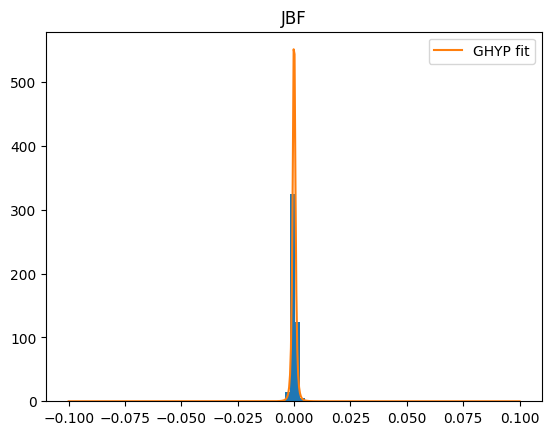

Kolmogorov-Smirnov test:  KstestResult(statistic=0.025163825413192398, pvalue=4.145239645640082e-101, statistic_location=2.539434313019156e-05, statistic_sign=1)
PEF parameter: 
(-1.6459168235063224, 0.10430162794484168, 0.10025699413343585, -3.9339046692818276e-05, 0.0010531843540655234)


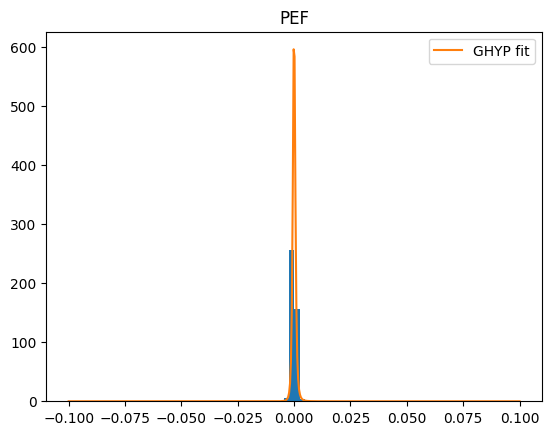

Kolmogorov-Smirnov test:  KstestResult(statistic=0.027412050583226655, pvalue=3.7422103164436164e-121, statistic_location=-2.9133881339502708e-05, statistic_sign=1)
QXF parameter: 
(0.34555827187490407, 0.14252735242581152, 0.0032428489860547817, -1.7747090938624582e-05, 0.0001234300407739255)


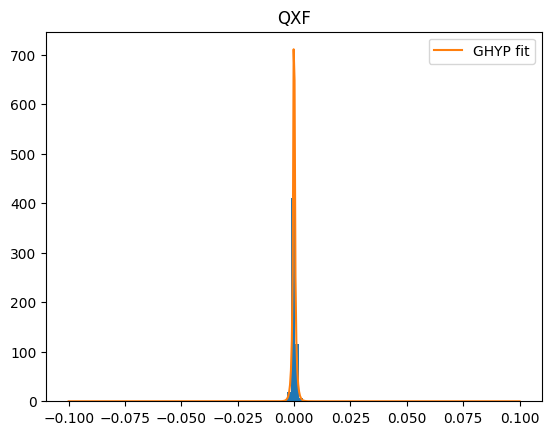

Kolmogorov-Smirnov test:  KstestResult(statistic=0.9999999999999796, pvalue=0.0, statistic_location=0.047313936847957094, statistic_sign=1)
IPF parameter: 
(0.5138949614783419, 0.10252755104484387, 0.002292764506607003, -2.5736587407677863e-05, 0.00010466952481369613)


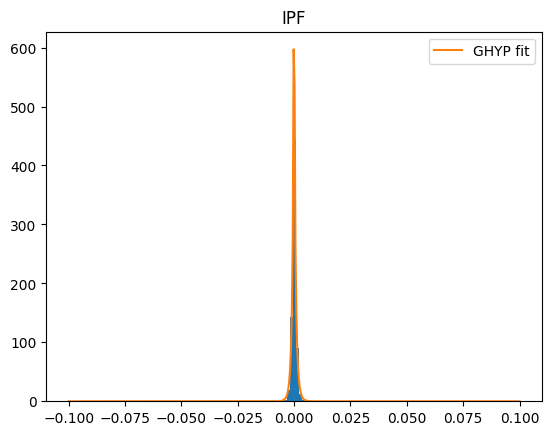

Kolmogorov-Smirnov test:  KstestResult(statistic=0.9999999956863661, pvalue=0.0, statistic_location=0.03718457183916704, statistic_sign=1)
EHF parameter: 
(-0.5795881437414986, 0.01062775003520763, 0.003508798385320722, -8.240085125198977e-05, 0.00040557807395322904)


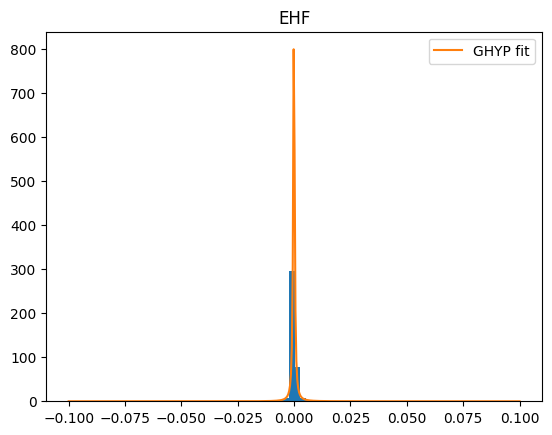

Kolmogorov-Smirnov test:  KstestResult(statistic=0.015532070584939994, pvalue=8.972917652588061e-32, statistic_location=-9.208171002715239e-05, statistic_sign=-1)
IIF parameter: 
(0.45398702248970557, 4.766950216849394e-10, 3.323295467932315e-11, -3.707634349094473e-05, 5.385147152435271e-13)


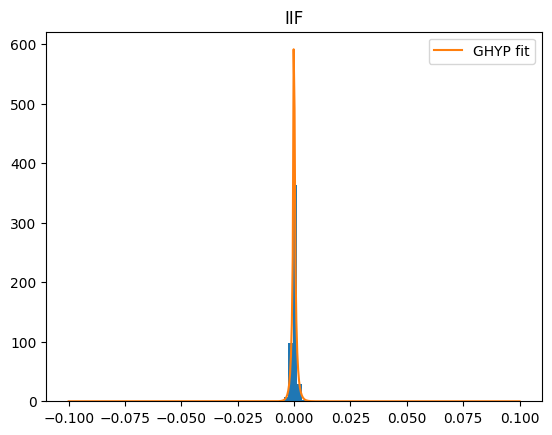

Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.055522589349431585, statistic_sign=1)
NAF parameter: 
(0.6760205098065659, 0.06978220463987003, 0.001261417019601086, -4.153620458077791e-06, 5.0994530007140504e-05)


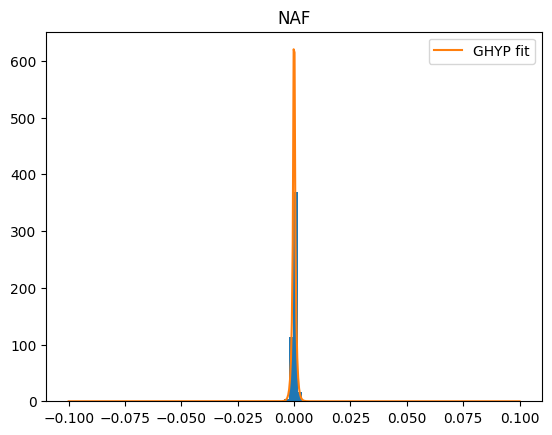

Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.05521686006535071, statistic_sign=1)
QWF parameter: 
(-1.8026541979438218, 0.07390651770855292, 0.07390651724989508, -5.094954181528456e-05, 0.0011105920973671622)


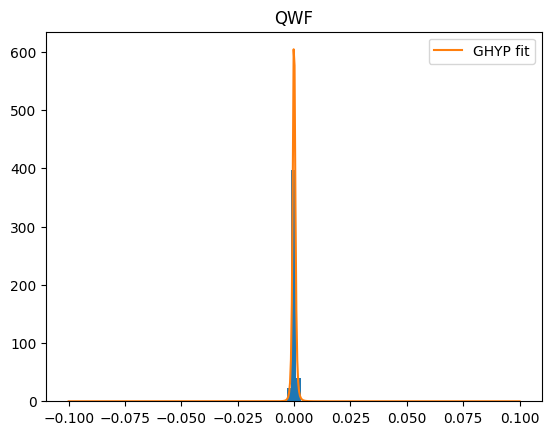

Kolmogorov-Smirnov test:  KstestResult(statistic=0.007075703167207015, pvalue=0.0025327386664213856, statistic_location=-0.0001915911306639791, statistic_sign=-1)
DBF parameter: 
(1.5040957819571381, 5.061267780467279e-07, 3.7246528245707653e-09, -9.666318072942188e-06, 2.202033926879013e-10)


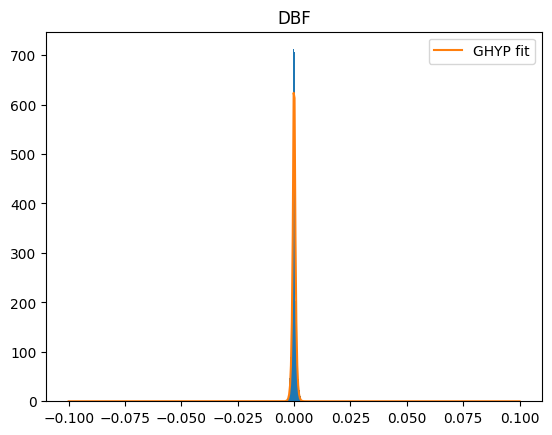

Kolmogorov-Smirnov test:  KstestResult(statistic=0.9999999999999972, pvalue=0.0, statistic_location=0.01183093412247022, statistic_sign=1)
HCF parameter: 
(-1.7884517384702416, 0.0321775469072331, 0.03217754179189902, -2.2090536612331607e-05, 0.000995322661058605)


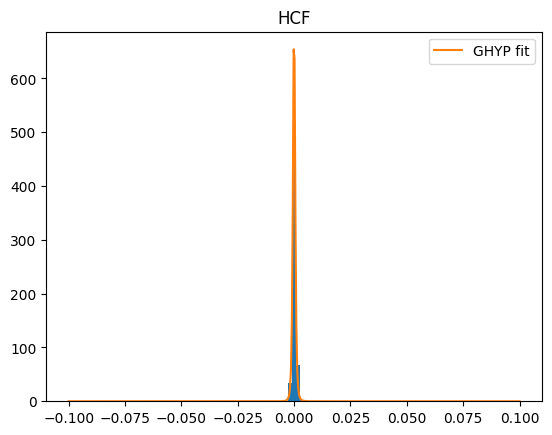

Kolmogorov-Smirnov test:  KstestResult(statistic=0.031120153840416998, pvalue=4.0172342502774993e-153, statistic_location=-0.00014129478824274943, statistic_sign=-1)


In [48]:
warnings.filterwarnings('ignore')
for file in spreadFiles:
  series = pd.read_csv(spreadPath + '/' + file, header=0, index_col=0)
  name = file.split('_')[0]
  model = AutoReg(series, lags=1).fit()
  resi = model.resid
  # Fit the data to a GHYP distribution
  fit = genhyperbolic.fit(resi)
  print(name + ' parameter: ')
  print(fit)
  x = np.linspace(-0.1, 0.1, 500)
  plt.hist(resi, bins=50, density = True)
  plt.plot(x, genhyperbolic.pdf(x, *fit), label='GHYP fit')
  plt.legend()
  plt.title(name)
  plt.show()
  print("Kolmogorov-Smirnov test: ",kstest(resi, 'genhyperbolic', args=fit))


===============JBF_spread.csv================


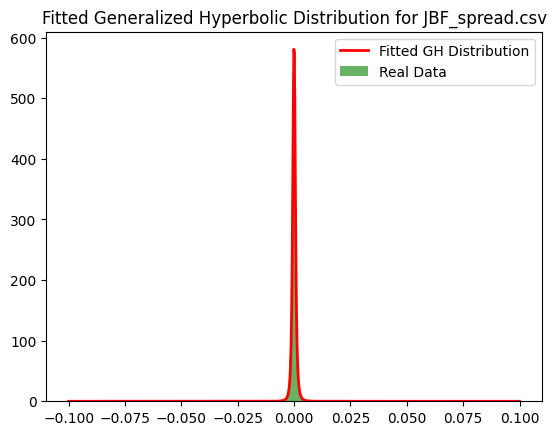

Kolmogorov-Smirnov test:  KstestResult(statistic=0.022094147550168808, pvalue=3.418091069252723e-08, statistic_location=-0.0002286496073307942, statistic_sign=-1)
===============PEF_spread.csv================


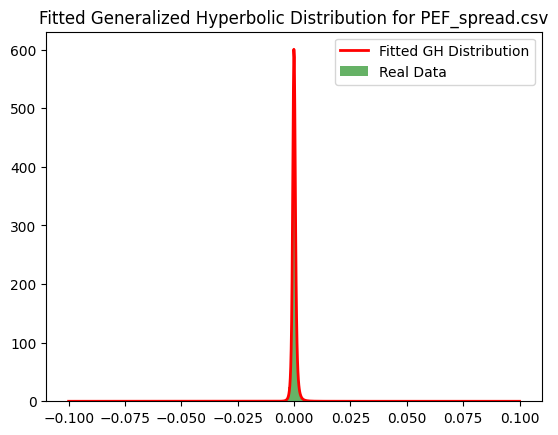

Kolmogorov-Smirnov test:  KstestResult(statistic=0.029984075174516178, pvalue=7.054121919767566e-15, statistic_location=0.00017770713323452642, statistic_sign=1)
===============QXF_spread.csv================


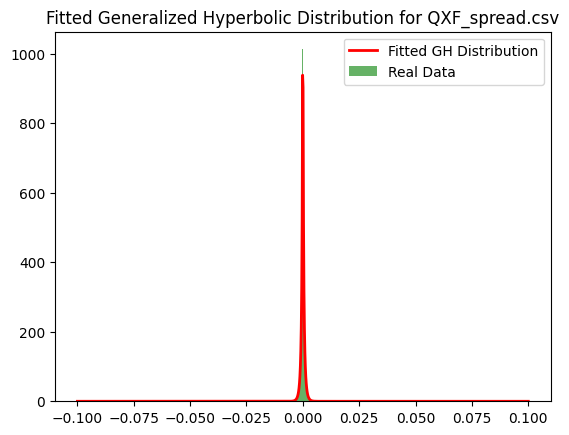

Kolmogorov-Smirnov test:  KstestResult(statistic=0.03347328755595741, pvalue=1.3944078275427512e-07, statistic_location=-0.00011239844155970903, statistic_sign=-1)
===============IPF_spread.csv================


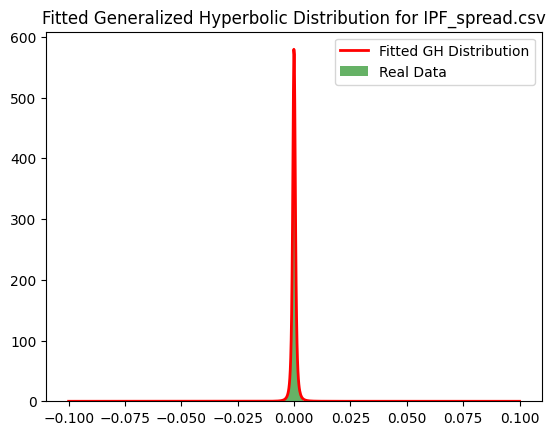

Kolmogorov-Smirnov test:  KstestResult(statistic=0.03909400789570949, pvalue=9.708584956819576e-25, statistic_location=-7.676381338440116e-05, statistic_sign=-1)
===============EHF_spread.csv================


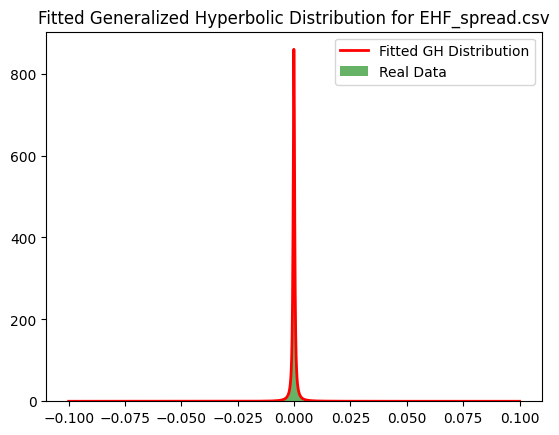

Kolmogorov-Smirnov test:  KstestResult(statistic=0.015096179364292084, pvalue=0.0021670216012713477, statistic_location=-9.200184229777794e-05, statistic_sign=-1)
===============IIF_spread.csv================


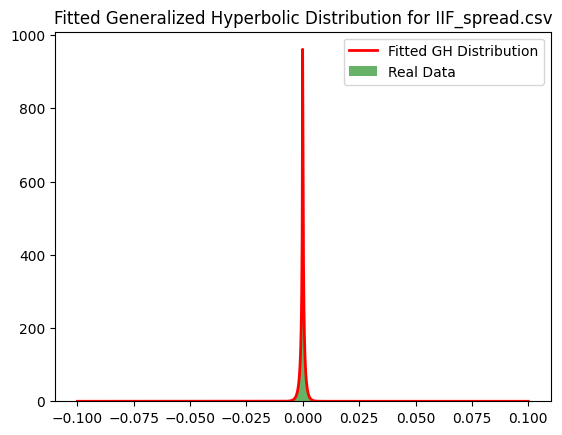

Kolmogorov-Smirnov test:  KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.029090714253603014, statistic_sign=1)
===============NAF_spread.csv================


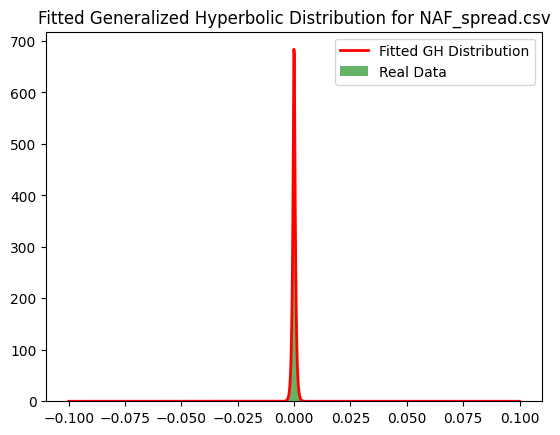

Kolmogorov-Smirnov test:  KstestResult(statistic=0.9999999999999999, pvalue=0.0, statistic_location=0.014535123710762758, statistic_sign=1)
===============QWF_spread.csv================


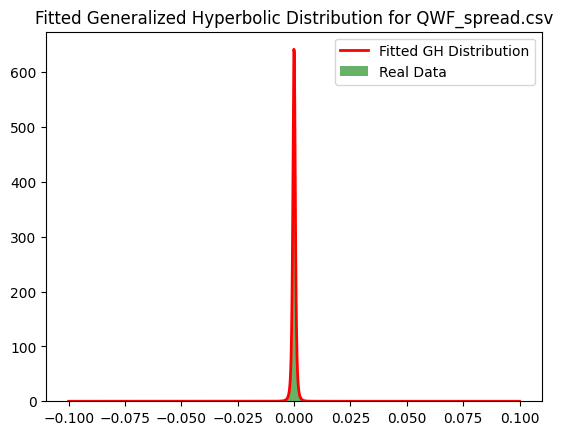

Kolmogorov-Smirnov test:  KstestResult(statistic=0.01052924220540391, pvalue=0.4484874331077793, statistic_location=-0.00018237324108160468, statistic_sign=1)
===============DBF_spread.csv================


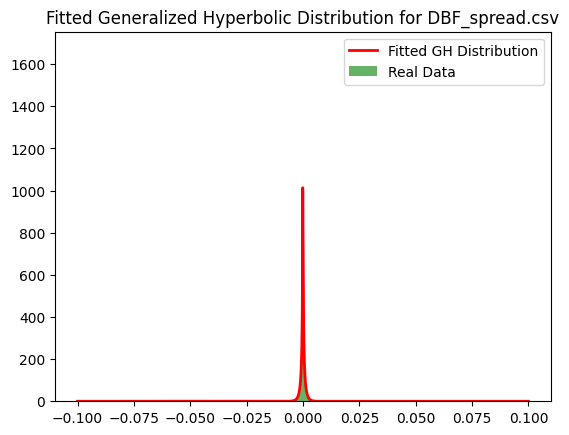

Kolmogorov-Smirnov test:  KstestResult(statistic=0.9999999976979879, pvalue=0.0, statistic_location=0.0054213437660775785, statistic_sign=1)
===============HCF_spread.csv================


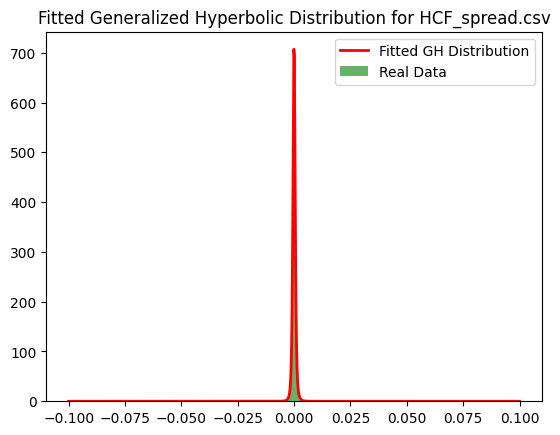

Kolmogorov-Smirnov test:  KstestResult(statistic=0.030311828210331904, pvalue=6.41171998974414e-15, statistic_location=-0.0001413971543151372, statistic_sign=-1)


In [47]:
import numpy as np
from scipy.stats import genhyperbolic, kstest

for i in spreadFiles:
    print("===============" + i + "================")
    X = pd.read_csv(spreadPath + '/' + i, header=0, index_col=0)

    model = AutoReg(X, lags=1)
    model_fit = model.fit()
    residuals = model_fit.resid
    # get 1/10 random sample from residuals
    residuals = residuals.sample(frac=0.1, replace=True, random_state=1)
    params = genhyperbolic.fit(residuals)
    # nu: The shape parameter 'nu' of the Generalized Hyperbolic Distribution.
    # alpha: The skewness parameter 'alpha' of the Generalized Hyperbolic Distribution.
    # beta: The scale parameter 'beta' of the Generalized Hyperbolic Distribution.
    # mu: The location parameter 'mu' of the Generalized Hyperbolic Distribution.
    # lambda_: The parameter 'lambda' of the Generalized Hyperbolic Distribution
    nu, alpha, beta, mu, lambda_ = params
    #plot the real data and the fitted distribution
    plt.hist(residuals, bins=100, density=True, alpha=0.6, color='g')
    x = np.linspace(-0.1, 0.1, 1000)
    pdf_fitted = genhyperbolic.pdf(x, nu, alpha, beta, mu, lambda_)
    plt.plot(x, pdf_fitted, 'r-', lw=2)
    plt.title('Fitted Generalized Hyperbolic Distribution for ' + i)
    plt.legend(['Fitted GH Distribution', 'Real Data'])
    plt.show()
    # Kolmogorov-Smirnov test
    print("Kolmogorov-Smirnov test: ",kstest(residuals, 'genhyperbolic', args=params))